### Keyword Analysis

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('keyword_stats_sorted.csv')

In [2]:
df

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range)
0,ai dungeons,USD,500000,0%,0%,Low,0,NaN,NaN
1,ai game,USD,50000,0%,900%,Low,6,0.98,4.10
2,pimsleur,USD,50000,0%,0%,Low,23,2.37,9.90
3,learn english,USD,50000,0%,0%,Low,17,0.71,3.12
4,spanish classes,USD,50000,0%,0%,Low,30,2.43,8.61
...,...,...,...,...,...,...,...,...,...
4336,voice room hellotalk,USD,50,0%,0%,Low,0,NaN,NaN
4337,world best language learning app,USD,50,0%,0%,Low,21,0.30,3.12
4338,www duolingo com learn,USD,50,0%,0%,Low,7,NaN,NaN
4339,www duolingo com website,USD,50,0%,∞,Low,14,NaN,NaN


#### Creating a word cloud of keywords

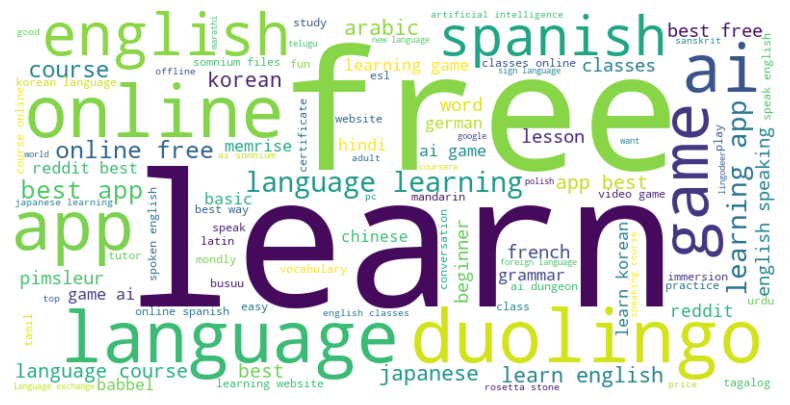

In [6]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combining all keywords into a single string
text = ' '.join(df['Keyword'])

# Defining a list of stop words to exclude
stopwords = set(STOPWORDS)

# Creating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, max_words=100).generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Extracting traffic volume of keywords

In [12]:
!pip install fuzzywuzzy


In [17]:
import pandas as pd
from fuzzywuzzy import process

# Load CSV Data into DataFrame
# df = pd.read_csv('path_to_your_csv_file.csv')

# Normalize keywords to lowercase for consistent matching
df['Keyword'] = df['Keyword'].str.lower()

# Specifying the list of keywords formed from word cloud
specified_keywords = [
    "language learning", "ai game", "language game", "learn english",
    "online spanish classes", "learn spanish online", "interactive language games",
    "language learning game", "online language learning", "gamified language learning",
    "language learning app", "best language learning app", "learn language online",
    "fun language learning", "learn languages with AI", "AI language tutor", "AI Game",
    "virtual language tutor", "AI language learning game", "AI-powered language learning",
    "immersive language learning"
]

# Normalize specified keywords to lowercase
specified_keywords = [keyword.lower() for keyword in specified_keywords]

# Extract Search Volume for specified keywords using fuzzy matching
keyword_search_volume = {}
for keyword in specified_keywords:
    # Use fuzzy matching to find the closest match
    result = process.extractOne(keyword, df['Keyword'])
    
    # Ensure result is not None and unpack correctly
    if result:
        best_match, score = result if len(result) == 2 else (result[0], result[1])
        
        if score > 80:  # Adjust the threshold as needed
            filtered_data = df[df['Keyword'] == best_match]
            search_volume = filtered_data['Avg. monthly searches'].sum()
            keyword_search_volume[keyword] = search_volume
        else:
            keyword_search_volume[keyword] = 'Not Found'
    else:
        keyword_search_volume[keyword] = 'Not Found'

# Displaying keyword_search_volume dictionary
print(keyword_search_volume)


{'language learning': 5000, 'ai game': 50000, 'language game': 50, 'learn english': 50000, 'online spanish classes': 50000, 'learn spanish online': 50, 'interactive language games': 50, 'language learning game': 500, 'online language learning': 100, 'gamified language learning': 50, 'language learning app': 5000, 'best language learning app': 10000, 'learn language online': 10000, 'fun language learning': 50, 'learn languages with ai': 50, 'ai language tutor': 500000, 'virtual language tutor': 50, 'ai language learning game': 500, 'ai-powered language learning': 5000, 'immersive language learning': 500}


In [9]:
pip install google-play-scraper


Note: you may need to restart the kernel to use updated packages.


#### Validating keywords using Google playstore 

In [4]:
import pandas as pd
from google_play_scraper import search

# List of keywords to validate
keywords = [
    "language learning", "ai game", "learn english",
    "online spanish classes", "learn spanish online", "interactive language games",
    "language learning game", "online language learning", "gamified language learning",
    "language learning app", "best language learning app", "learn language online",
    "fun language learning", "learn languages with AI", "AI language tutor",
    "virtual language tutor", "AI language learning game", "AI-powered language learning",
    "immersive language learning", "language game" 
]

# Function to gather information for each keyword
def validate_keywords(keywords):
    results = []
    for keyword in keywords:
        search_results = search(keyword, lang='en', country='us')
        if search_results:
            app_info = search_results[0]  # Take the first result
            # Print keys for debugging
            print(f"Keys for keyword '{keyword}': {app_info.keys()}")
            results.append({
                'Keyword': keyword,
                'App Title': app_info.get('title', 'N/A'),
                'Rating': app_info.get('score', 'N/A'),
                'Reviews': app_info.get('reviews', 'N/A'),  # Adjusted from 'ratings' to 'reviews'
                'Installs': app_info.get('installs', 'N/A'),
                'App Id': app_info.get('appId', 'N/A')
            })
        else:
            results.append({
                'Keyword': keyword,
                'App Title': 'N/A',
                'Rating': 'N/A',
                'Reviews': 'N/A',
                'Installs': 'N/A',
                'App Id': 'N/A'
            })
    return results

# Validate the keywords and save the results to a CSV file
keyword_data = validate_keywords(keywords)
df = pd.DataFrame(keyword_data)
df.to_csv('keyword_validation_results.csv', index=False)

print("Keyword validation results saved to 'keyword_validation_results.csv'")


Keys for keyword 'language learning': dict_keys(['appId', 'icon', 'screenshots', 'title', 'score', 'genre', 'price', 'free', 'currency', 'video', 'videoImage', 'description', 'descriptionHTML', 'developer', 'installs'])
Keys for keyword 'ai game': dict_keys(['appId', 'icon', 'screenshots', 'title', 'score', 'genre', 'price', 'free', 'currency', 'video', 'videoImage', 'description', 'descriptionHTML', 'developer', 'installs'])
Keys for keyword 'learn english': dict_keys(['appId', 'icon', 'screenshots', 'title', 'score', 'genre', 'price', 'free', 'currency', 'video', 'videoImage', 'description', 'descriptionHTML', 'developer', 'installs'])
Keys for keyword 'online spanish classes': dict_keys(['appId', 'icon', 'screenshots', 'title', 'score', 'genre', 'price', 'free', 'currency', 'video', 'videoImage', 'description', 'descriptionHTML', 'developer', 'installs'])
Keys for keyword 'learn spanish online': dict_keys(['appId', 'icon', 'screenshots', 'title', 'score', 'genre', 'price', 'free', '

#### Using an API to search competitor ranking on Google search; script to be run on vscode

In [ ]:
import requests
import csv

API_KEY = '####'
CX = '###'

# Targeted competitors
competitors = ["duolingo.com", "talkpal.ai", "rosettastone.com"]

def get_search_results(query):
    url = f"https://www.googleapis.com/customsearch/v1?q={query}&key={API_KEY}&cx={CX}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

def main():
    keywords = [
        "language learning", "ai game", "learn english", "online spanish classes", 
        "learn spanish online", "interactive language games", "language learning game", 
        "online language learning", "gamified language learning", "language learning app", 
        "best language learning app", "learn language online", "fun language learning", 
        "learn languages with AI", "AI language tutor", "virtual language tutor", 
        "AI language learning game", "AI-powered language learning", "immersive language learning", 
        "language game"
    ]

    results_data = []

    for keyword in keywords:
        print(f"Searching for keyword: {keyword}")
        results = get_search_results(keyword)
        if results and 'items' in results:
            for idx, item in enumerate(results['items'], start=1):
                title = item.get('title')
                link = item.get('link')
                displayLink = item.get('displayLink')
                competitor_flag = any(comp in displayLink for comp in competitors)
                results_data.append([keyword, idx, title, link, displayLink, competitor_flag])
                print(f"Found result: {title} - {link}")

    # Saving results to a CSV file
    if results_data:
        with open('search_results.csv', 'w', newline='', encoding='utf-8') as csvfile:
            fieldnames = ['Keyword', 'Rank', 'Title', 'Link', 'DisplayLink', 'IsCompetitor']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            
            writer.writeheader()
            for row in results_data:
                writer.writerow({
                    'Keyword': row[0],
                    'Rank': row[1],
                    'Title': row[2],
                    'Link': row[3],
                    'DisplayLink': row[4],
                    'IsCompetitor': row[5]
                })
        print("Results saved to search_results.csv")
    else:
        print("No results to save.")

if __name__ == "__main__":
    main()


In [ ]:
python google_search.py
